<a href="https://colab.research.google.com/github/arti1117/making-tars/blob/main/hg-mldl/09_3_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500
)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

In [6]:
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 10ms/step - loss: 0.6925 - accuracy: 0.5341 - val_loss: 0.6916 - val_accuracy: 0.5874
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6896 - accuracy: 0.6165 - val_loss: 0.6872 - val_accuracy: 0.6304
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6788 - accuracy: 0.6702 - val_loss: 0.6649 - val_accuracy: 0.6926
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6273 - accuracy: 0.7086 - val_loss: 0.6058 - val_accuracy: 0.7162
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5912 - accuracy: 0.7266 - val_loss: 0.5852 - val_accuracy: 0.7376
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5724 - accuracy: 0.7413 - val_loss: 0.5682 - val_accuracy: 0.7462
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5550 - accuracy: 0.7553 - val_loss: 0.5598 - val_accuracy: 0.73

In [7]:
import matplotlib.pyplot as plt

def plot_history(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train', 'val'])
  plt.show()

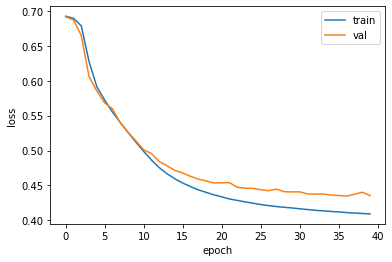

In [8]:
plot_history(history)

In [11]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 10ms/step - loss: 0.6927 - accuracy: 0.5386 - val_loss: 0.6922 - val_accuracy: 0.5802
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6914 - accuracy: 0.5877 - val_loss: 0.6905 - val_accuracy: 0.6176
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6886 - accuracy: 0.6232 - val_loss: 0.6867 - val_accuracy: 0.6378
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6827 - accuracy: 0.6526 - val_loss: 0.6783 - val_accuracy: 0.6582
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6683 - accuracy: 0.6741 - val_loss: 0.6536 - val_accuracy: 0.6922
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6179 - accuracy: 0.7160 - val_loss: 0.5855 - val_accuracy: 0.7274
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5739 - accuracy: 0.7308 - val_loss: 0.5630 - val_accuracy: 0.735

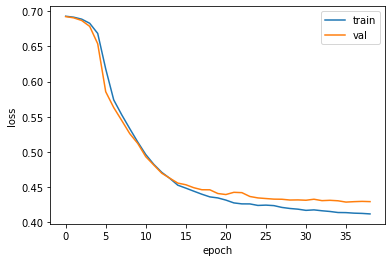

In [12]:
plot_history(history)

In [13]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 13s 24ms/step - loss: 0.6929 - accuracy: 0.5124 - val_loss: 0.6924 - val_accuracy: 0.5586
Epoch 2/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6911 - accuracy: 0.5803 - val_loss: 0.6895 - val_accuracy: 0.6226
Epoch 3/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6843 - accuracy: 0.6321 - val_loss: 0.6769 - val_accuracy: 0.6550
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6540 - accuracy: 0.6741 - val_loss: 0.6191 - val_accuracy: 0.7014
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5798 - accuracy: 0.7121 - val_loss: 0.5515 - val_accuracy: 0.7290
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5396 - accuracy: 0.7387 - val_loss: 0.5253 - val_accuracy: 0.7470
Epoch 7/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5216 - accuracy: 0.7501 - val_loss: 0.5138 - val_accuracy

In [14]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_3 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_4 (LSTM)               (None, 8)                 544       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


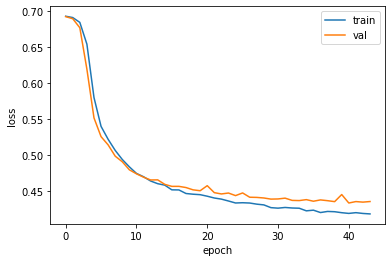

In [15]:
plot_history(history)

In [16]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 11ms/step - loss: 0.6924 - accuracy: 0.5240 - val_loss: 0.6913 - val_accuracy: 0.5582
Epoch 2/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6903 - accuracy: 0.5625 - val_loss: 0.6890 - val_accuracy: 0.5800
Epoch 3/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6868 - accuracy: 0.5885 - val_loss: 0.6850 - val_accuracy: 0.5962
Epoch 4/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6812 - accuracy: 0.6050 - val_loss: 0.6784 - val_accuracy: 0.6098
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6720 - accuracy: 0.6230 - val_loss: 0.6680 - val_accuracy: 0.6238
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6574 - accuracy: 0.6409 - val_loss: 0.6512 - val_accuracy: 0.6352
Epoch 7/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6341 - accuracy: 0.6615 - val_loss: 0.6239 - val_accuracy: 0.

In [17]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


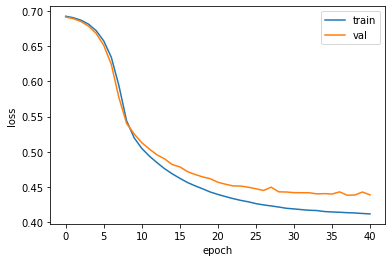

In [18]:
plot_history(history)

In [19]:
test_seq = pad_sequences(test_input, maxlen=100)
dropout_model = keras.models.load_model('best-dropout-model.h5')
dropout_model.evaluate(test_seq, test_target)

782/782 [==============================] - 5s 5ms/step - loss: 0.4268 - accuracy: 0.8007


[0.4268094003200531, 0.8006799817085266]